In [169]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import classification_report_imbalanced

In [170]:
# Import file
seattle_df = pd.read_csv('data/cleaned_seattle_data.csv')
seattle_df.head(10)

,ADDRTYPE,COLLISIONTYPE,FATALITIES,INATTENTIONIND,INCDATE,INJURIES,LIGHTCOND,PEDCOUNT,PEDCYLCOUNT,PERSONCOUNT,ROADCOND,SDOT_COLCODE,SERIOUSINJURIES,SEVERITYCODE,SEVERITYDESC,SPEEDING,ST_COLCODE,UNDERINFL,VEHCOUNT,WEATHER
0,2.0,9.0,0,0,2020/10/15 00:00:00+00,0,1.0,0,0,2,0.0,11.0,0,1,0,0,16,0,2,3.0
1,1.0,8.0,0,0,2022/08/17 00:00:00+00,0,1.0,0,0,2,0.0,14.0,0,1,0,0,14,0,2,1.0
2,1.0,8.0,0,0,2005/06/07 00:00:00+00,0,1.0,0,0,6,0.0,14.0,0,1,0,0,14,0,3,3.0
3,2.0,8.0,0,0,2020/10/04 00:00:00+00,0,2.0,0,0,3,0.0,14.0,0,1,0,0,14,0,2,1.0
4,1.0,4.0,0,0,2006/09/12 00:00:00+00,0,1.0,0,0,3,0.0,16.0,0,1,0,0,15,0,2,1.0
5,2.0,4.0,0,0,2013/03/25 00:00:00+00,0,1.0,0,0,2,0.0,11.0,0,1,0,0,28,0,2,1.0
6,1.0,6.0,0,0,2013/03/30 00:00:00+00,0,3.0,0,0,2,0.0,14.0,0,1,0,0,32,0,2,0.0
7,1.0,6.0,0,1,2007/10/07 00:00:00+00,0,1.0,0,0,2,1.0,11.0,0,1,0,0,20,0,2,4.0
8,2.0,1.0,0,0,2022/07/14 00:00:00+00,0,1.0,0,0,4,0.0,11.0,0,1,0,0,10,0,2,1.0
9,1.0,4.0,0,0,2013/04/02 00:00:00+00,0,1.0,0,0,2,0.0,11.0,0,1,0,0,28,0,2,3.0


In [171]:
# Columns included
selected_columns = ['FATALITIES', 'LIGHTCOND', 'ROADCOND', 'WEATHER',
                     'SPEEDING', 'COLLISIONTYPE', 'SERIOUSINJURIES', 'UNDERINFL', 'ADDRTYPE', 'PERSONCOUNT', 'INATTENTIONIND']
ml_seattle_df = seattle_df[selected_columns]
ml_seattle_df.dropna(inplace=True)
ml_seattle_df['INJURY'] = (ml_seattle_df['FATALITIES'] > 0) | (ml_seattle_df['SERIOUSINJURIES'] > 0)
len(ml_seattle_df)

206175

In [172]:
ml_seattle_df.head()

,FATALITIES,LIGHTCOND,ROADCOND,WEATHER,SPEEDING,COLLISIONTYPE,SERIOUSINJURIES,UNDERINFL,ADDRTYPE,PERSONCOUNT,INATTENTIONIND,INJURY
0,0,1.0,0.0,3.0,0,9.0,0,0,2.0,2,0,False
1,0,1.0,0.0,1.0,0,8.0,0,0,1.0,2,0,False
2,0,1.0,0.0,3.0,0,8.0,0,0,1.0,6,0,False
3,0,2.0,0.0,1.0,0,8.0,0,0,2.0,3,0,False
4,0,1.0,0.0,1.0,0,4.0,0,0,1.0,3,0,False


In [173]:
ml_seattle_df.dtypes

FATALITIES           int64
LIGHTCOND          float64
ROADCOND           float64
WEATHER            float64
SPEEDING             int64
COLLISIONTYPE      float64
SERIOUSINJURIES      int64
UNDERINFL            int64
ADDRTYPE           float64
PERSONCOUNT          int64
INATTENTIONIND       int64
INJURY                bool
dtype: object

In [174]:
X = ml_seattle_df[['LIGHTCOND', 'ROADCOND', 'WEATHER', 'SPEEDING', 
                   'COLLISIONTYPE', 'ADDRTYPE', 'UNDERINFL']]
y = ml_seattle_df['INJURY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

average = 'macro'

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=average)
recall = recall_score(y_test, y_pred, average=average)
f1 = f1_score(y_test, y_pred, average=average)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9820298290287377
Precision: 0.49101491451436885
Recall: 0.5
F1-score: 0.49546672539734976


In [176]:
from sklearn.ensemble import RandomForestClassifier

In [177]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
average = 'macro'
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=average)
recall = recall_score(y_test, y_pred, average=average)
f1 = f1_score(y_test, y_pred, average=average)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9816175578998424
Precision: 0.5710579956321281
Recall: 0.5024397576569049
F1-score: 0.500583236334994


In [178]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [179]:
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train_resampled, y_train_resampled)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
average = 'macro'
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=average)
recall = recall_score(y_test, y_pred, average=average)
f1 = f1_score(y_test, y_pred, average=average)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.5979871468412756
Precision: 0.5082757008232307
Recall: 0.6131508661552099
F1-score: 0.3990229439948069


In [180]:
model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
average = 'macro'
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=average)
recall = recall_score(y_test, y_pred, average=average)
f1 = f1_score(y_test, y_pred, average=average)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8329816903116285
Precision: 0.5266828601440614
Recall: 0.7135881479117514
F1-score: 0.5102150059535469


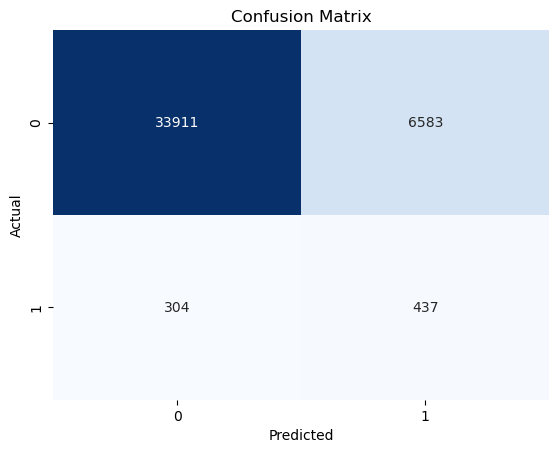

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [182]:
feature_importances = model.feature_importances_
importances_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})
importances_df = importances_df.sort_values(by='importance', ascending=False)
importances_df

,feature,importance
4,COLLISIONTYPE,0.641020
5,ADDRTYPE,0.080133
2,WEATHER,0.079771
1,ROADCOND,0.078465
0,LIGHTCOND,0.070221
3,SPEEDING,0.033702
6,UNDERINFL,0.016688


In [183]:
collisiontype_injury_percentage = ml_seattle_df.groupby('COLLISIONTYPE')['INJURY'].mean() * 100

collisiontype_injury_percentage = collisiontype_injury_percentage.sort_values(ascending=False)
collisiontype_injury_percentage

# collisiontype_key = {'Angles': 1,
#                      'Cycles': 2,
#                      'Head On': 3,
#                      'Left Turn': 4,
#                      'Other': 5,
#                      'Parked Car': 6,
#                      'Pedestrian': 7,
#                      'Rear Ended': 8,
#                      'Right Turn': 9,
#                      'Sideswipe': 10,
#                     }


COLLISIONTYPE
7.0     13.851675
2.0      7.852515
3.0      6.095552
5.0      2.602202
4.0      2.162054
1.0      1.385331
9.0      0.813517
8.0      0.698688
10.0     0.475547
6.0      0.338042
Name: INJURY, dtype: float64